# Difference of Means

In [20]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from graspy.plot import pairplot
from lol import LOL
from sklearn.model_selection import StratifiedKFold

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Define paths
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag='_gcca')

In [3]:
labels

[['e', 'restingstate'],
 ['e', 'openmonitoring'],
 ['e', 'compassion'],
 ['n', 'restingstate'],
 ['n', 'openmonitoring'],
 ['n', 'compassion']]

In [4]:
X = np.vstack(groups)
X = X.reshape(X.shape[0], -1)
y = np.concatenate([[i]*len(groups[i]) for i in range(len(labels))])
print(X.shape)

(228, 56145)


## Fit LOL

In [5]:
traits = np.concatenate([[l[0]]*len(groups[i]) for i,l in enumerate(labels)])
states = np.concatenate([[l[1]]*len(groups[i]) for i,l in enumerate(labels)])
state_traits = np.concatenate([[l[0] + ' ' + l[1]]*len(groups[i]) for i,l in enumerate(labels)])

In [6]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, traits)

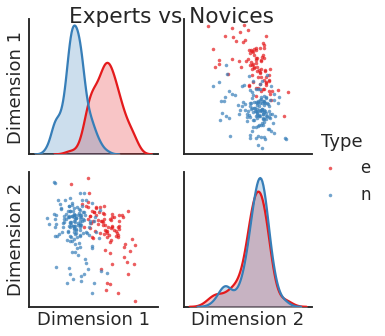

In [7]:
pairplot(proj, traits, title='Experts vs Novices')

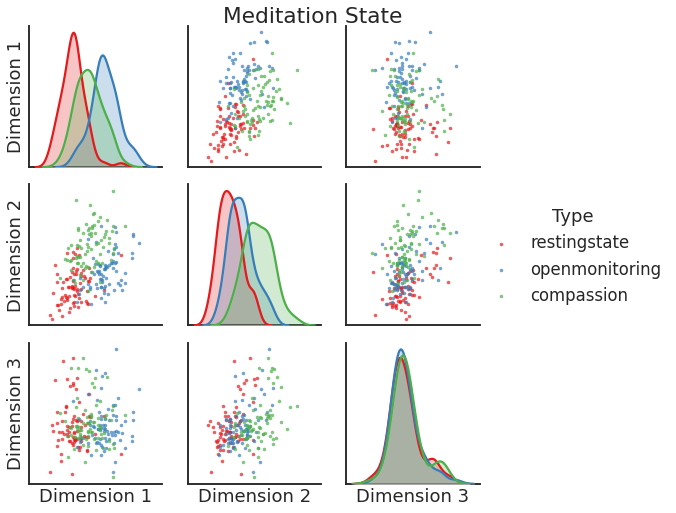

In [8]:
lol = LOL(n_components=4, svd_solver='full')
proj = lol.fit_transform(X, states)

pairplot(proj, states, title='Meditation State')

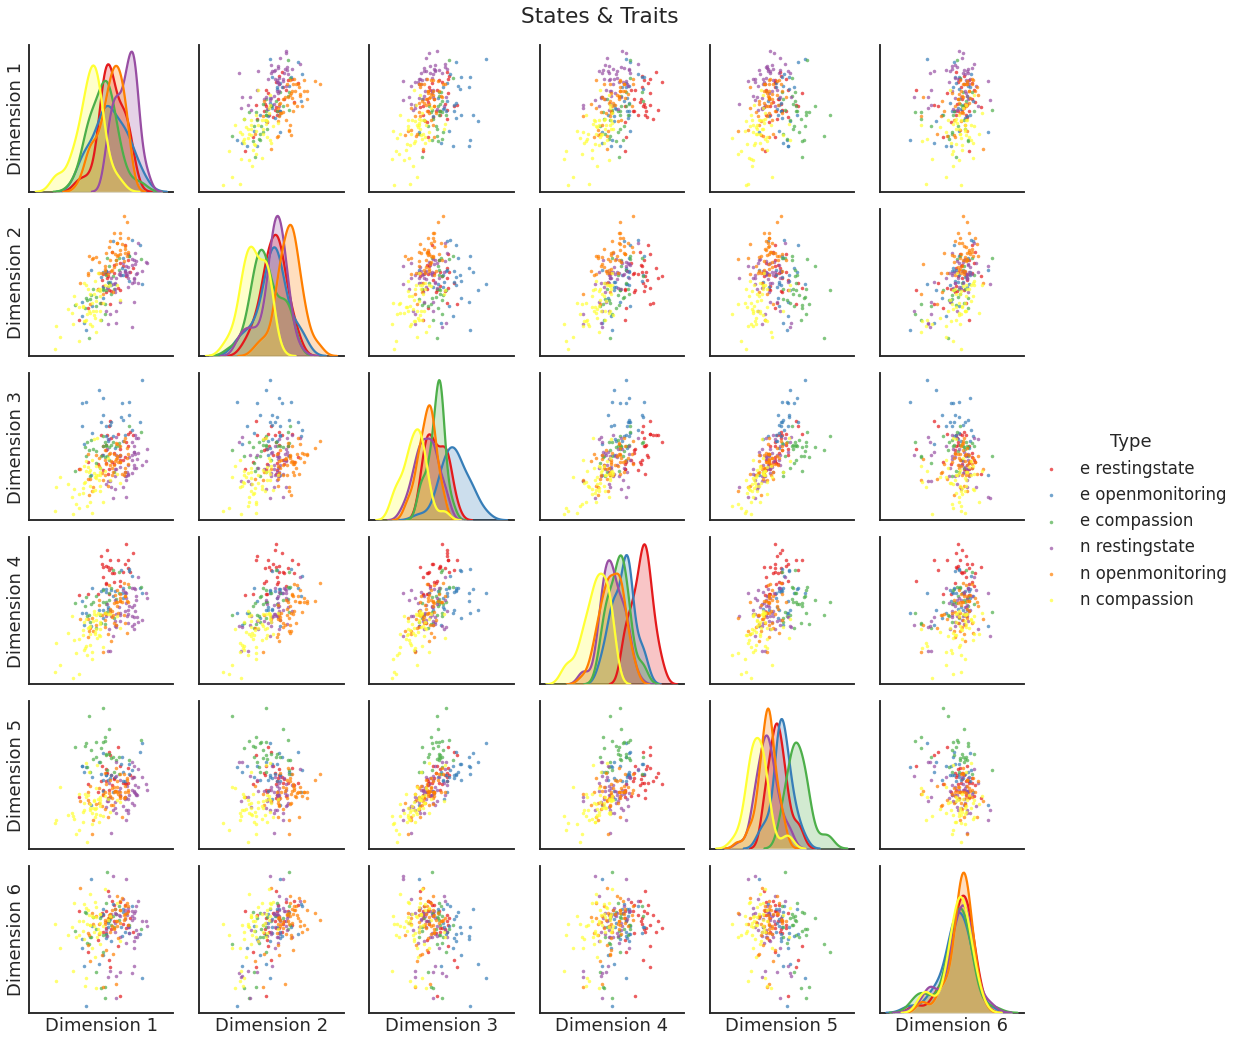

In [9]:
lol = LOL(n_components=7, svd_solver='full')
proj = lol.fit_transform(X, state_traits)

pairplot(proj, state_traits, title='States & Traits')

## Try max-rank ZG 2
Prior was min rank ZG 3

In [124]:
base_dir = Path('/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/')
groups, labels = get_latents(base_dir, flag='_gcca')

In [125]:
X = np.vstack(groups)
X = X.reshape(X.shape[0], -1)
y = np.concatenate([[i]*len(groups[i]) for i in range(len(labels))])
print(X.shape)

(228, 131005)


In [126]:
traits = np.concatenate([[l[0]]*len(groups[i]) for i,l in enumerate(labels)])
states = np.concatenate([[l[1]]*len(groups[i]) for i,l in enumerate(labels)])
state_traits = np.concatenate([[l[0] + ' ' + l[1]]*len(groups[i]) for i,l in enumerate(labels)])

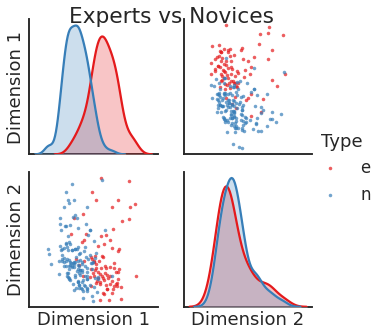

In [127]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, traits)

pairplot(proj, traits, title='Experts vs Novices')

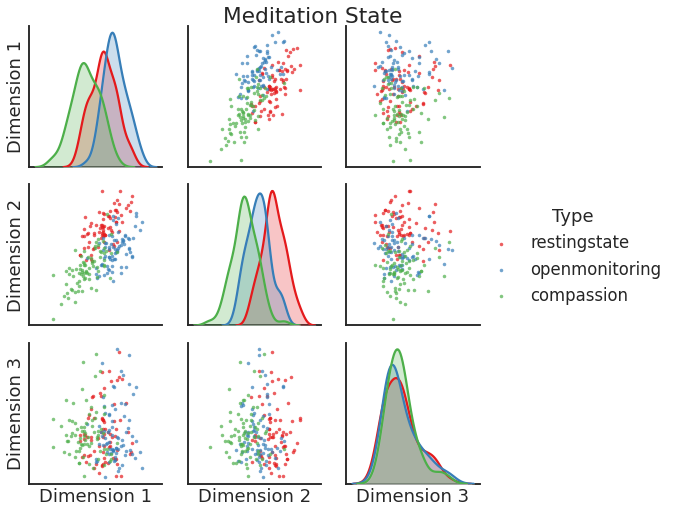

In [128]:
lol = LOL(n_components=4, svd_solver='full')
proj = lol.fit_transform(X, states)

pairplot(proj, states, title='Meditation State')

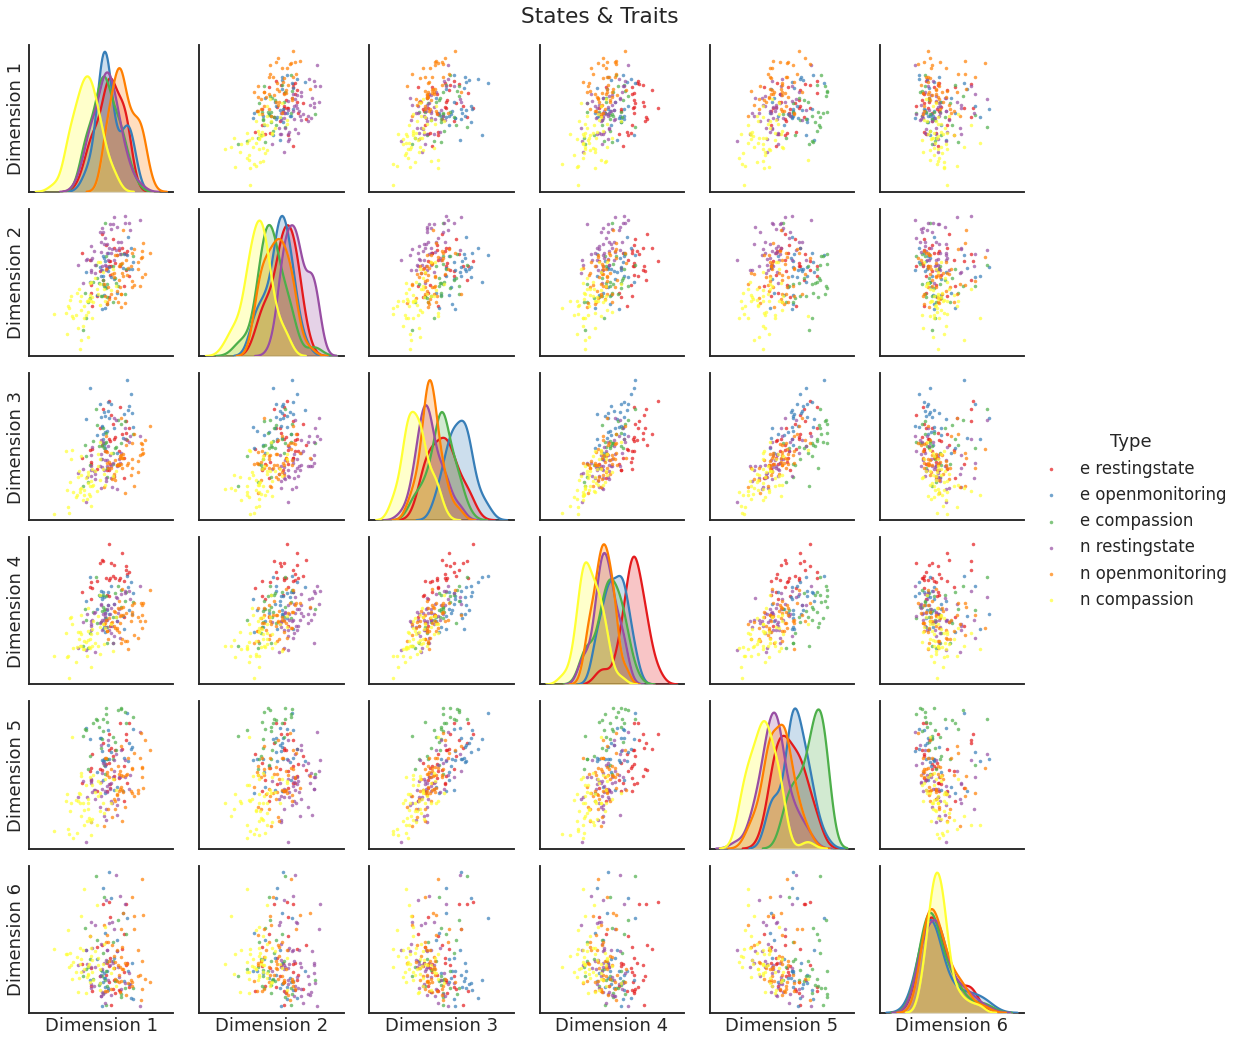

In [129]:
lol = LOL(n_components=7, svd_solver='full')
proj = lol.fit_transform(X, state_traits)

pairplot(proj, state_traits, title='States & Traits')

## Refit 1st set, out of sample

In [10]:
## Define paths
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag='_gcca')

In [11]:
X = np.vstack(groups)
X = X.reshape(X.shape[0], -1)
y = np.concatenate([[i]*len(groups[i]) for i in range(len(labels))])
print(X.shape)

(228, 56145)


In [12]:
states = np.asarray([int(i > 2) for i in y])

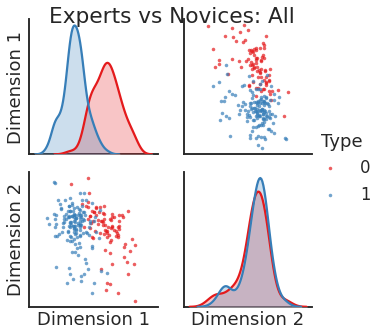

In [13]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, states)
pairplot(proj, states, title=f'Experts vs Novices: All')

In [15]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [16]:
projs = []
test_idxs = []

In [17]:
for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    lol = LOL(n_components=3, svd_solver='full')
    projs.append(lol.fit(X[train_index], states[train_index]).transform(X[test_index]))
    test_idxs.append(test_index)

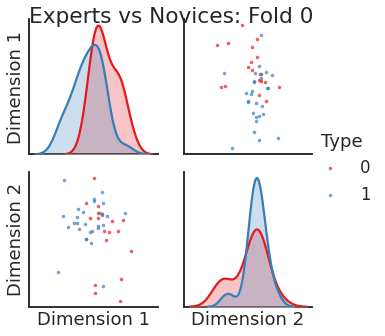

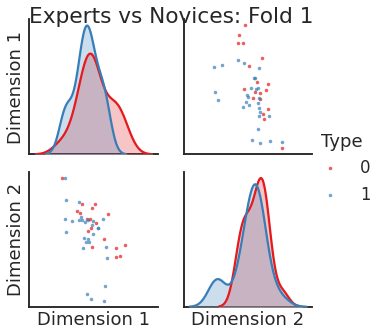

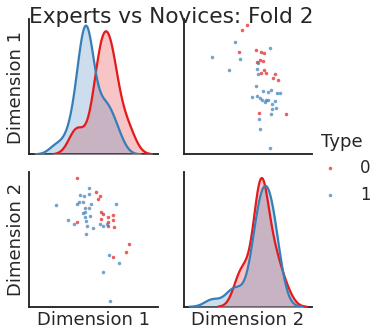

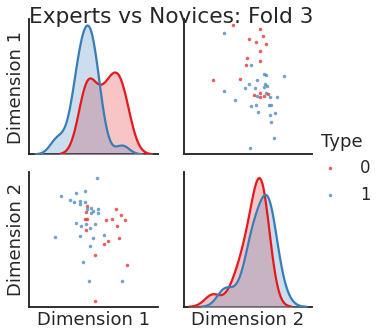

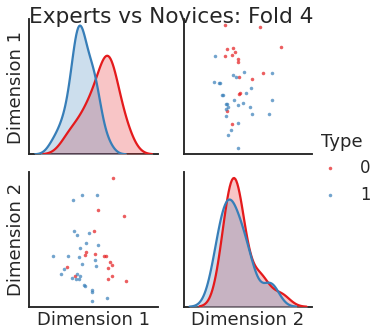

In [19]:
for i,(proj, test_idx) in enumerate(zip(projs, test_idxs)):
    pairplot(proj, states[test_idx], title=f'Experts vs Novices: Fold {i}')

## OOS 6-way

In [ ]:
lol = LOL(n_components=7, svd_solver='full')
proj = lol.fit_transform(X, state_traits)

pairplot(proj, state_traits, title='States & Traits')

### Null test

In [2]:
## Define paths
#base_dir = Path('/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/')
#groups, labels = get_latents(base_dir, flag='_gcca')
base_dir = Path('/mnt/ssd3/ronan/data/gcca_old_min_rank-ZG3/')
groups, labels = get_latents(base_dir, flag='_gcca-zg')

In [3]:
X = np.vstack(groups)
X = X.reshape(X.shape[0], -1)
y = np.concatenate([[i]*len(groups[i]) for i in range(len(labels))])
print(X.shape)

(228, 149720)


In [4]:
traits = np.concatenate([[l[0]]*len(groups[i]) for i,l in enumerate(labels)])
states = np.concatenate([[l[1]]*len(groups[i]) for i,l in enumerate(labels)])
state_traits = np.concatenate([[l[0] + ' ' + l[1]]*len(groups[i]) for i,l in enumerate(labels)])

In [33]:
y = np.copy(traits); np.random.shuffle(y)

In [40]:
len(groups[3])

47

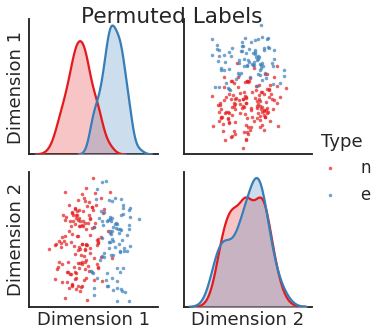

In [34]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, y)
pairplot(proj, y, title=f'Permuted Labels')

In [42]:
X = np.random.normal(0,1,X.shape)
y = np.asarray([0]*29*3 + [1]*47*3)

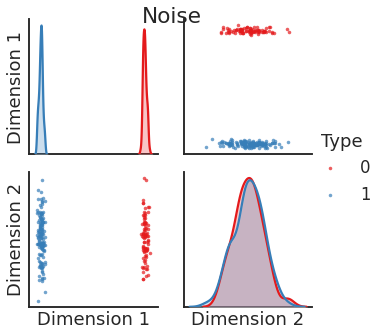

In [43]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, y)
pairplot(proj, y, title=f'Noise')

In [5]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=200)
Xhat = pca.fit_transform(X)

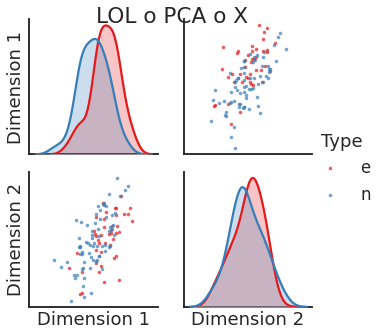

In [23]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit(Xhat[::2], traits[::2]).transform(Xhat[1::2])
pairplot(proj, traits[1::2], title=f'LOL o PCA o X')

In [19]:
traits[::2].shape

(114,)